# Домашнее задание №7: деревья, случайный лес (14.5 баллов)
<!-- ![](meme.jpg) -->
<img src="meme.jpg" alt="Drawing" style="width: 700px;"/>

## Часть 1: основы построения решающие дерева

начнём с простого...

### Задание 1.1 (1 балл)
Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 - $k_2$. Посчитайте энтропию (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [1]:
import numpy as np
n1 = 8
n2 = 2
x = - n1/(n1+n2)*np.log(n1/(n1+n2)) - n2/(n1+n2)*np.log(n2/(n1+n2))
print('Entropy:', float('%.2f' % (x)))

Entropy: 0.5


#### (*・‿・)ノ⌒*:･ﾟ✧

### Задание 1.2 (1 балл)
Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности (в формулировке разности impurity пришедшей выборки и полученного разбиения) такой вершины с применением индекса Джини. Ответ округлите до двух знаков после запятой.

In [2]:
n1 = 8
n2 = 2
h_r = 1 - (n1/(n1+n2))**2 - (n2/(n1+n2))**2
h_r_l = 1 - (n1/(n1+0))**2 - 0
h_r_r = 1 - (n2/(0+n2))**2 - 0
x = h_r - n1/(n1+n2)*h_r_l - n2/(n1+n2)*h_r_r
print('Informativeness', float('%.2f' % (x)))

Informativeness 0.32


#### (￣▽￣)/♫•*¨*•.¸¸♪

### Задание 1.3 (0.5 балла)
Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

In [3]:
xs = [1, 10, 5, 18, 100, 30, 50, 61, 84, 47]
print('Prediction', np.mean(xs))

Prediction 40.6


#### ༼ つ ◕_◕ ༽つ

## Часть 2: решающие деревья

### Задание 2.1 (2 балла)
Первым делом реализуйте функцию `find_best_split`, которая должна находить оптимальное разбиение подмножества обучающей выборки. При решении задачи регрессии испольуйте дисперсию подвыборки, при решении задачи классификации используйте критерий Джини. Эту функцию можно протестировать на датасете `Boston` из `sklearn`.

In [4]:
from collections import Counter
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
y = boston["target"]
X.head()

# print(boston["DESCR"])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


При решении задания имейте в виду, что под критерием Джини подразумевается такая функция:

$$Q(R) = -\frac {|R_{\ell}|}{|R|}H(R_\ell) -\frac {|R_r|}{|R|}H(R_r) ,$$

где $R$ — множество объектов, попавших в вершину, $R_{\ell}$ и $R_r$ — объекты, попавшие в левое и правое поддеревья,
$H(R) = 1 - p_1^2 - p_0^2$, $p_1$, $p_0$ — доли объектов класса 1 и 0 соответственно.

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое. Обратите внимание, что это далеко не оптимальные способ учёта категориальных признаков. Например, можно было бы на каждое значение категориального признака создавать отдельное поддерево или использовать более сложные подходы. Подробнее об этом можно прочитать в конспектах [лекций](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture07-trees.pdf) по машинному обучению на ПМИ (раздел «Учёт категориальных признаков»).

В качестве подсказок реализации можете пользоваться кодом из бонусной части семинара по решающим деревьям (скачайте решённую версию ноутбука).

**Note:** Разрешается делать цикл для перебора порогов, но возможна имплементация без него. За имплементацию без цикла бонус 0.7 балла

In [6]:
def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame], 
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`
    
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
    if feature_type == 'real':
        srtd = np.sort(np.unique(feature_vector)) #уникальность нужна для того, чтобы самый первый или последний порог не образовали пустое множество в дочерней вершине
        srtd_ = srtd[1:]
        thresholds = (srtd[:-1]+srtd_)/2
    else:
        thresholds = set(feature_vector)
    if task == 'classification':
        ginis = []
        if len(thresholds) == 0: #попадает сюда если признак константный
            ginis.append(-1) #ставим минимальную информативность на него, чтобы впоследующем дерево не рассматривало разбиение по этому признаку
            ginis = np.array(ginis)
            opt_threshold = feature_vector[0]
            gini_best = np.max(ginis)
                
            
        else:        
            for t in thresholds:
                if feature_type == 'categorial':
                    mask1 = feature_vector == t
                    mask2 = feature_vector != t
                else:
                    mask1 = feature_vector <= t
                    mask2 = feature_vector > t

                T_l = target_vector[mask1]
                T_r = target_vector[mask2]
                k_l_1 = T_l[T_l == 0]
                k_l_2 = T_l[T_l == 1]
                k_r_1 = T_r[T_r == 0]
                k_r_2 = T_r[T_r == 1]
                H_l = 1-(len(k_l_1)/len(T_l))**2 - (len(k_l_2)/len(T_l))**2
                H_r = 1-(len(k_r_1)/len(T_r))**2 - (len(k_r_2)/len(T_r))**2
                x = -len(T_l)/len(target_vector)*H_l - len(T_r)/len(target_vector)*H_r
                ginis.append(x)
            gini_best = np.max(ginis)
            ginis = np.array(ginis)
            ind = np.argmax(ginis)
            opt_threshold = thresholds[ind]

        return (thresholds, ginis, opt_threshold, gini_best)

    elif task == 'regression':
        variances = []
        if len(thresholds) == 0: #попадает сюда если признак константный
            variances.append(float('-inf')) #ставим минимальную информативность на него, чтобы впоследующем дерево не рассматривало разбиение по этому признаку
            variances = np.array(variances)
            opt_threshold = feature_vector[0]
            variance_best = np.max(variances)
        else:
            for t in thresholds:
                if feature_type == 'categorial':
                    mask1 = feature_vector == t
                    mask2 = feature_vector != t
                else:
                    mask1 = feature_vector <= t
                    mask2 = feature_vector > t
                T_l = target_vector[mask1]
                T_r = target_vector[mask2]
                x = -len(T_l)/len(target_vector)*T_l.var() - len(T_r)/len(target_vector)*T_r.var()
                variances.append(x)
            variances = np.array(variances)
            variance_best = np.max(variances)
            ind = np.argmax(variances)
            opt_threshold = thresholds[ind]

        return (thresholds, variances, opt_threshold, variance_best)

thresholds, variances, threshold_best, variance_best = find_best_split(
    X["CRIM"].to_numpy(), 
    y, 
    task="regression",
    feature_type="real"
)

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `CRIM`.

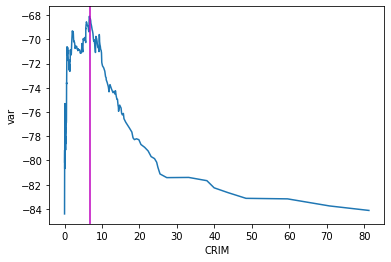

In [7]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
plt.plot(thresholds, variances)
plt.axvline(x=threshold_best, color = 'm')
plt.ylabel('var')
plt.xlabel('CRIM')
plt.show()

### Задание 2.2 (3 балла)
Разберитесь с написанным кодом решающего дерева, заполните пропуски в коде и реализуйте недостающий метод _predict_node.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции в разделе «Построение дерева».
- Выбор лучшего разбиения необходимо производить по критерию Джини
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку
- Ответ в листе: наиболее часто встречающийся класс в листе

In [8]:
class DecisionTree:
    def __init__(
        self, 
        feature_types: Union[List[str], np.ndarray], 
        max_depth: int = None, 
        min_samples_split: int = None, 
        min_samples_leaf: int = None,
        task: str = "classification"
    ) -> None:
        
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        # В этой переменной будем хранить узлы решающего дерева. Каждая вершина хранит в себе идентификатор того,
        # является ли она листовой. Листовые вершины хранят значение класса для предсказания, нелистовые - правого и
        # левого детей (поддеревья для продолжения процедуры предсказания)
        self._tree = {}
        
        # типы признаков (категориальные или числовые)
        self._feature_types = feature_types
        
        # гиперпараметры дерева
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.task = task

    def _fit_node(
        self, 
        sub_X: np.ndarray, 
        sub_y: np.ndarray, 
        node: dict
    ) -> None:
        
        # критерий останова
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            # подготавливаем признак для поиска оптимального порога
            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                # здесь могла быть реализация более сложного подхода к обработке категориального признака
                feature_vector = sub_X[:, feature]

            # ищем оптимальный порог
            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self.task, feature_type)
            
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                # split - маска на объекты, которые должны попасть в левое поддерево
                if feature_type == "real":
                    threshold_best = threshold
                    split = feature_vector <= threshold_best
                    # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
                elif feature_type == "categorical":
                    # в данной реализации это просто значение категории
                    threshold_best = threshold
                    split = feature_vector == threshold_best
                    # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
                else:
                    raise ValueError

        # записываем полученные сплиты в атрибуты класса
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["category_split"] = threshold_best
        else:
            raise ValueError
            
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x: np.ndarray, node: dict) -> int:
        """
        Предсказание начинается с корневой вершины дерева и рекурсивно идёт в левое или правое поддерево в зависимости от значения
        предиката на объекте. Листовая вершина возвращает предсказание.
        :param x: np.array, элемент выборки
        :param node: dict, вершина дерева
        """
        # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
        if node["type"] == "nonterminal": #если вершина внутренняя
            if self._feature_types[node["feature_split"]] == "categorial" : # предсказание по категор признаку идёт в левое или правое поддерево
                if x[node["feature_split"]] == node["category_split"]:
                    return self._predict_node(x, node["left_child"])
                else:
                    return self._predict_node(x, node["right_child"])
            else:              # предсказание по веществ признаку идёт в левое или правое поддерево
                if x[node["feature_split"]] <= node["threshold"]:
                    return self._predict_node(x, node["left_child"])
                else:
                    return self._predict_node(x, node["right_child"])
        else: #если листовая
            return node["class"]
                

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._fit_node(X, y, self._tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
            
        return np.array(predicted)

### Задание 2.3 (1 балл)
Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')


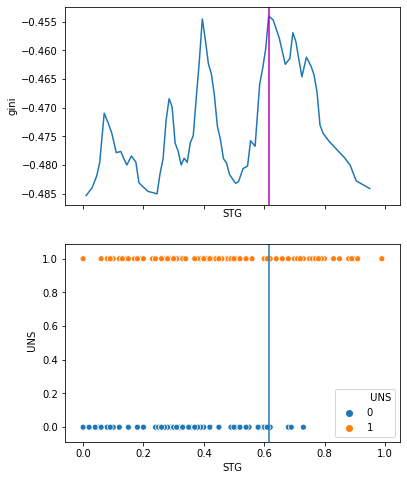

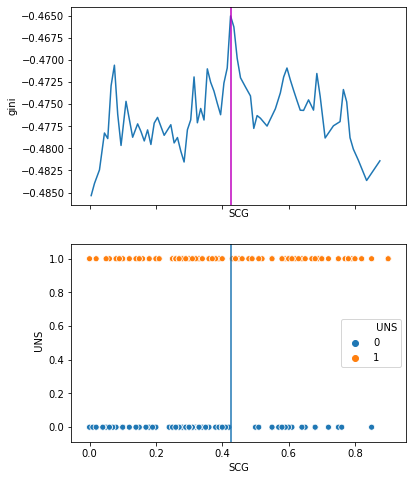

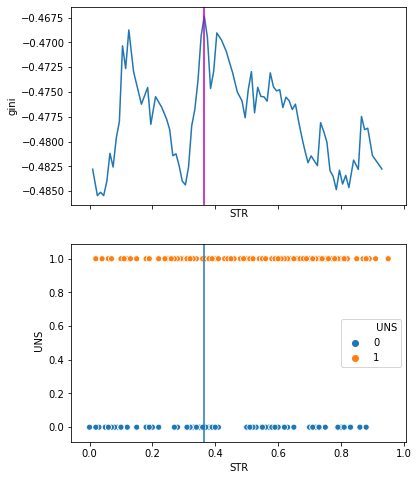

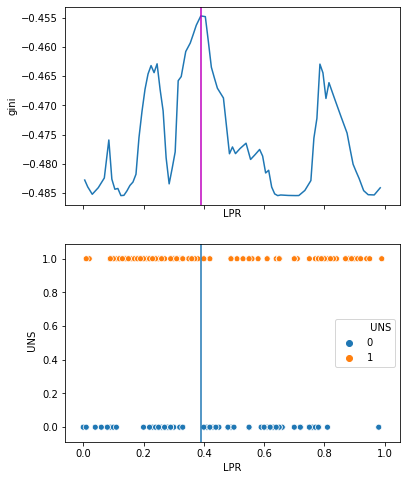

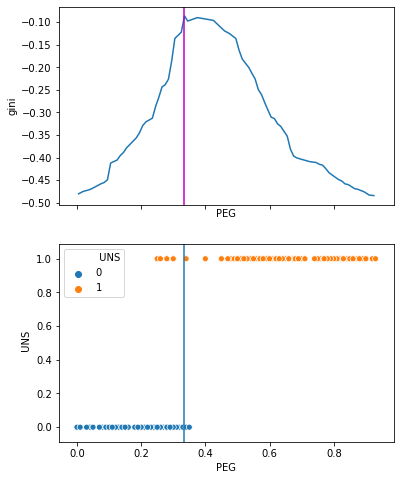

In [9]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
import seaborn as sns
data = pd.read_csv('students.csv')
print(data.columns)
data.head()
y = data[' UNS']
X = data.drop(' UNS', axis=1)

for col in X.columns:
    fig, (ax1, ax2) = plt.subplots(2, sharex = True)
    thresholds, variances, threshold_best, variance_best = find_best_split(
    X[col].to_numpy(), 
    y.to_numpy(), 
    task="classification",
    feature_type="real")
    ax1.plot(thresholds, variances)
    ax1.set_ylabel('gini')
    ax1.set_xlabel(col)
    ax1.axvline(x=threshold_best, color = 'm')
    
    ax2 = sns.scatterplot(x = X[col], y = y, hue = y)
    ax2.axvline(x=threshold_best)
    fig.set_size_inches(6, 8)
    plt.show()

### Задание 2.4 (1 балл)

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

У хороших для разделения выборки признаков на графике зависимости значения порога признака и значения критерия инормативности есть один глобальный максимум, который очень хорошо заметен. Поэтому на конкретных данных самый удачный признак это PEG. Также можно заметить на scatter-графике, что порог разделяет классы лучше чем при остальных признаках(практически все синие и оранжевые по разные стороны от порога). Для плохих же имеется множество локальных максимумумов, а также может быть практически пологой( то есть одинаковая информативность на всех порогах), на scatter-графиках таких признаков по разные стороны порога находятся как оранжевые так и синие, визуального разделения не происходит).

### Задание 2.5 (1 балл)

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

In [10]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
data = pd.read_csv('agaricus-lepiota.data', header=None, sep=",")
le = preprocessing.LabelEncoder()
data = data.apply(lambda x: le.fit_transform(x), axis=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X = data.drop(0, axis=1)
y = data[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)
ft = []
for i in range(len(X_train.columns)):
     ft.append('real')
tree_ = DecisionTree(task = 'classification', feature_types = ft)
tree_.fit(X_train.to_numpy(), y_train.to_numpy())
y_predicted = tree_.predict(X_test.to_numpy())
print('accuracy', accuracy_score(y_test, y_predicted))

accuracy 1.0


## Часть 3: бэггинг, случайный лес

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [12]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

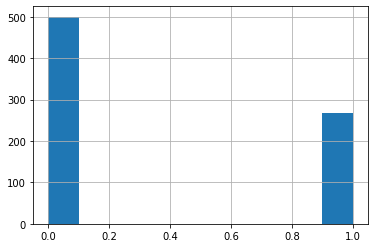

In [14]:
data['Outcome'].hist()
plt.show()

Разделите данные на признаки и целевую переменную. Разбейте датасет на тренировочную и тестовую части в отношении 70:30.

In [15]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
y = data["Outcome"]
X = data.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Задание 3.1 (1 балл)

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [16]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
bag = BaggingClassifier(random_state = 10, n_estimators = 50)
bag.fit(X_train, y_train)
y_predicted = bag.predict(X_test)
print('accuracy', accuracy_score(y_test, y_predicted))
print('precision', precision_score(y_test, y_predicted))
print('recall', recall_score(y_test, y_predicted))
print('roc-auc', roc_auc_score(y_test, y_predicted))

accuracy 0.7792207792207793
precision 0.8103448275862069
recall 0.5402298850574713
roc-auc 0.7319204980842913


### Задание 3.2 (1 балл)

Теперь обучите Random Forest с таким же количеством деревьев. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [17]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
rand_forest = RandomForestClassifier(random_state = 10, n_estimators = 50)
rand_forest.fit(X_train, y_train)
y_predicted = rand_forest.predict(X_test)
print('accuracy', accuracy_score(y_test, y_predicted))
print('precision', precision_score(y_test, y_predicted))
print('recall', recall_score(y_test, y_predicted))
print('roc-auc', roc_auc_score(y_test, y_predicted))

accuracy 0.7532467532467533
precision 0.75
recall 0.5172413793103449
roc-auc 0.7065373563218391


чем лучше все 4 вычисленные показателя, тем модель лучше. Значит, лучше себя показала BaggingClassifier.

### Задание 3.3 (1 балл)

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Используйте heat map для визуализации. Какие выводы вы можете сделать?

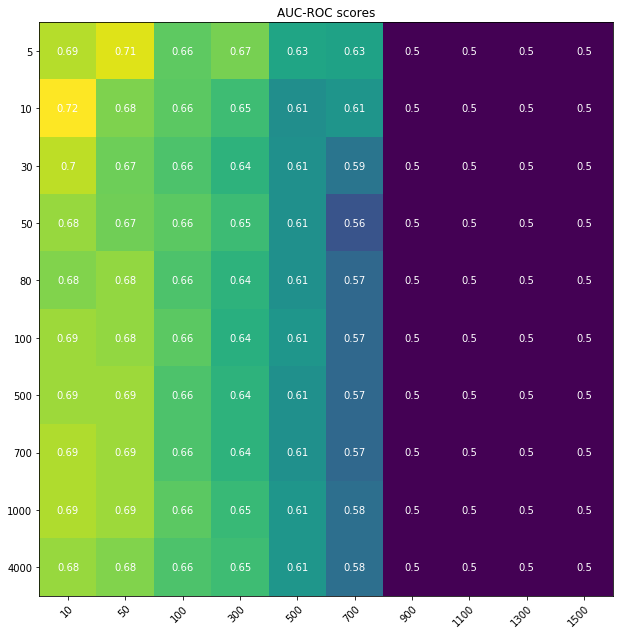

In [18]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
import matplotlib
import matplotlib.pyplot as plt
ests = [10, 50, 100, 300, 500, 700, 900, 1100, 1300, 1500]
samps = [5, 10, 30, 50, 80, 100, 500, 700, 1000, 4000]
matr_auc = []
models = []
for i in ests:
    row_auc = []
    row_forest = []
    for j in samps:
        rand_forest = RandomForestClassifier(random_state = 10, n_estimators = i, min_samples_leaf = j)
        rand_forest.fit(X_train, y_train)
        models.append(rand_forest)
        y_predicted = rand_forest.predict(X_test)
        row_auc.append(roc_auc_score(y_test, y_predicted))
    matr_auc.append(row_auc)
aucs = np.array(matr_auc)
models = np.array(models)
fig, ax = plt.subplots()
im = ax.imshow(aucs)
ax.set_xticks(np.arange(len(ests)))
ax.set_yticks(np.arange(len(samps)))
ax.set_xticklabels(ests)
ax.set_yticklabels(samps)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(ests)):
    for j in range(len(samps)):
        text = ax.text(j, i, float('%.2f' % (aucs[i, j])),
                       ha="center", va="center", color="w")

ax.set_title("AUC-ROC scores")
fig.tight_layout()
fig.set_size_inches(10.5, 10.5)
plt.show()

лучший результат - n_estimators = 10, min_samples_leaf = 10 и значением auc-roc = 0.72

### Задание 3.4 (1 балл)

Для лучшей модели случайного леса посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

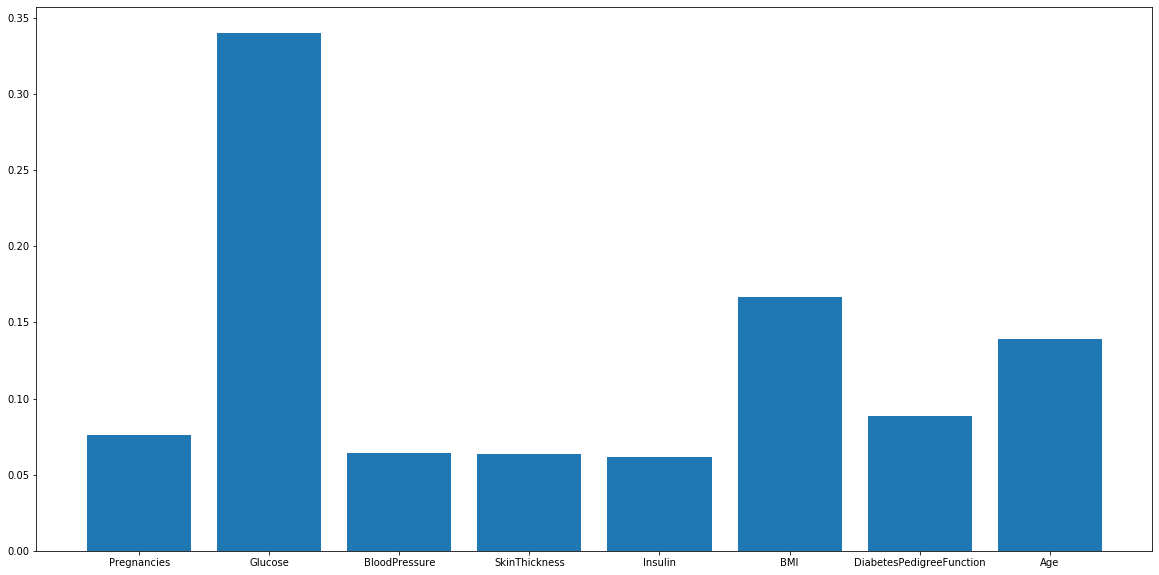

In [21]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
ind = np.argmax(aucs)
best_model = models[ind]
f_imp = best_model.feature_importances_
plt.bar(x = X.columns, height = f_imp)
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

Наиболее важным оказался признак значения глюкозы в крови, т.к. наибольшее значение в списке feature_importances_ было у него